# Data Visualization and Preprocessing 


#### Human Activity Recognition Dataset


## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

## Loading the dataset

In [5]:
import io
data = pd.read_csv("train.csv")
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Person,Work
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


## Structure of the dataset

In [6]:
data.dtypes.value_counts()

float64    548
object       1
int64        1
dtype: int64

In [10]:
data.Work.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Work, dtype: int64

# Data Visualization

### Count of people doing different activities

c:\users\suchika\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


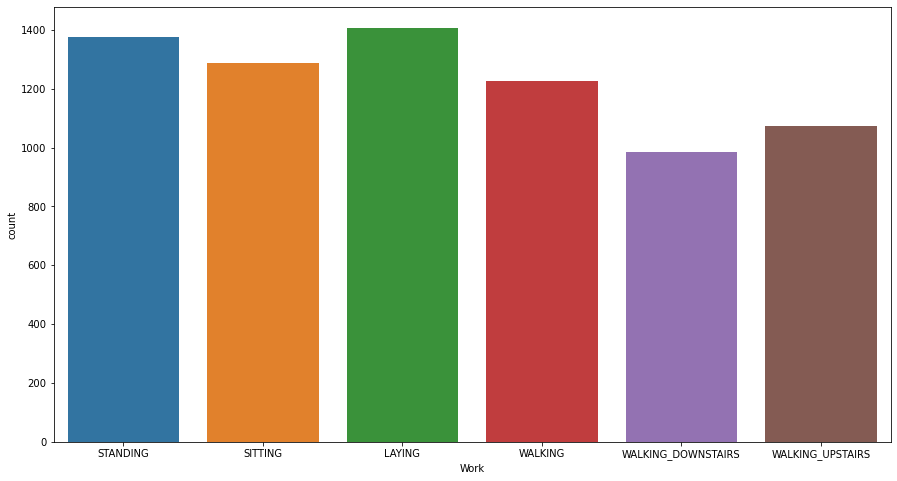

In [5]:
plt.figure(figsize=(15,8))
sns.countplot(data['Work'])
plt.show()

 Observation:-Count of Persons doing what type of activity


### Percentage of people doing different activities

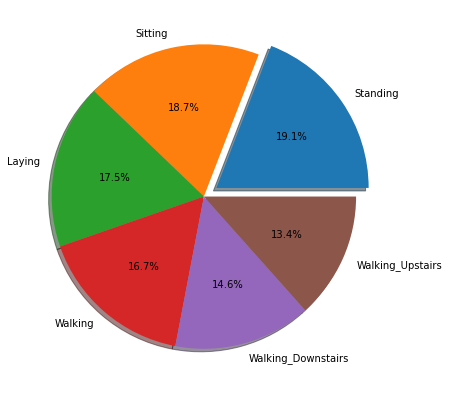

In [6]:
plt.figure(figsize=(18,7))
explode = (0.1, 0, 0, 0,0,0)
plt.pie(data.Work.value_counts(),explode=explode,labels=['Standing','Sitting','Laying','Walking','Walking_Downstairs','Walking_Upstairs'],autopct='%1.1f%%',shadow=True)
plt.show()

### Different devices used

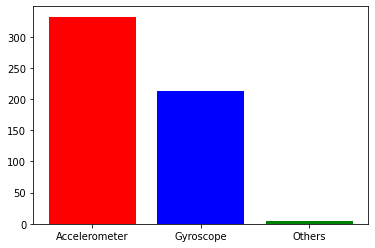

In [7]:
acc = 0
gyro = 0
others = 0
for column in data.columns:
    if 'Acc' in str(column):
        acc += 1
    elif 'Gyro' in str(column):
        gyro += 1
    else:
        others += 1

# Show bar plot for the three types
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [acc, gyro, others], color = ('r', 'b', 'g'))
plt.show()


### Heatmap for top 10 features

In [8]:
df=data.iloc[:,1:10]
df

,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X
0,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724
1,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068
2,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692
3,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692
4,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469
...,...,...,...,...,...,...,...,...,...
7347,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795
7348,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440
7349,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999
7350,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702


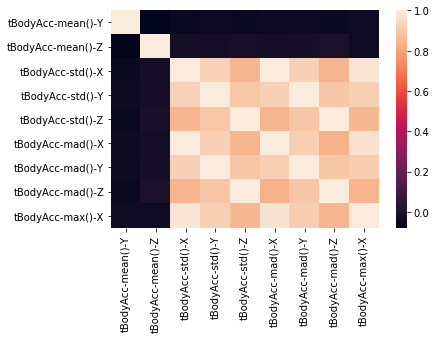

In [9]:
sns.heatmap(df.corr())

### Insights: From heatmap we can conclude that tBodyAcc-mean()-Y and tBodyAcc-mean()-Z are not corelated features.Other Features are highly corelated.

### Thus, we have to perform feature reduction as some features are highly correlated and some are not.

## Boxplots for visualization 

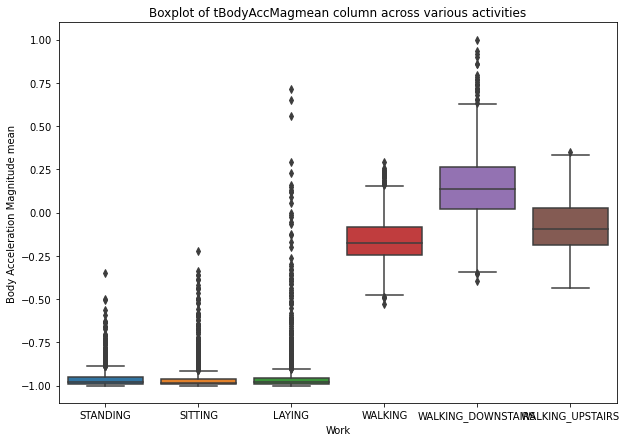

In [8]:

plt.figure(figsize = (10,7))
sns.boxplot(x = 'Work', y ='tBodyAccMag-mean()', data = data);
plt.ylabel('Body Acceleration Magnitude mean')
plt.title('Boxplot of tBodyAccMagmean column across various activities')
plt.show()

**Insights:-It shows that if body accceleration mean is less than (-0.50) then it is static activity  else it is moving activity.**

# Data Preprocessing

## Checking for NULL Values

In [11]:
#Checking null values count
data.isna().sum().sum()

0

#### There are no NULL values in the dataset. 

## Label Encoding

#### It is used to identify each activity by an integral value.

In [13]:
#Encoing the lebels
le = LabelEncoder()
data['Work'] = le.fit_transform(data.Work)
data['Work'].sample(10)

6046    5
3769    5
6520    0
5935    1
7178    2
3198    4
1588    4
4910    2
995     2
1073    0
Name: Work, dtype: int32

## Allocating features and targets

In [14]:
#Allocating train features and targets

Train_features=data.iloc[:,:-1].copy()
Train_targets=data['Work'].copy()

## Correlation Filter

In [32]:
#High correlation filter
cor_matrix = Train_features.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]

print("Number of High correlation features:",len(to_drop))

Number of High correlation features: 440


## Applying correlation filter to data for Feature Reduction

In [33]:
#Applying High correlation filter

Train_features_reduced = Train_features.drop(to_drop, axis=1)
print("Shape after applying quasi constant filter :",Train_features_reduced.shape)

Shape after applying quasi constant filter : (7352, 109)


### We have a lot of highly correlated features, thus, we will remove them in order to improve our performance and reduce the computation time.